In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
titanic_test = pd.read_csv('test.csv')
titanic_train = pd.read_csv('train.csv')

In [6]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())

In [21]:
titanic_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [26]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
titanic_train['isFamily'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1

In [29]:
titanic_train['isAlone'] = titanic_train['isFamily'].apply(lambda x: 1 if x==1 else 0)

In [38]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'isFamily', 'isAlone'],
      dtype='object')

In [41]:
titanic_train.drop(columns=['SibSp', 'Parch', 'Embarked', 'Cabin', 'Name'])

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,isFamily,isAlone
0,1,0,3,male,22.0,A/5 21171,7.2500,2,0
1,2,1,1,female,38.0,PC 17599,71.2833,2,0
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,1,1
3,4,1,1,female,35.0,113803,53.1000,2,0
4,5,0,3,male,35.0,373450,8.0500,1,1
5,6,0,3,male,28.0,330877,8.4583,1,1
6,7,0,1,male,54.0,17463,51.8625,1,1
7,8,0,3,male,2.0,349909,21.0750,5,0
8,9,1,3,female,27.0,347742,11.1333,3,0
9,10,1,2,female,14.0,237736,30.0708,2,0


In [70]:
median_price = titanic_train['Fare'].median()
mean_price = titanic_train['Fare'].mean()
print(median_price) ; print(mean_price)

14.4542
32.204207968574636


Text(0.5, 1.0, 'Ages')

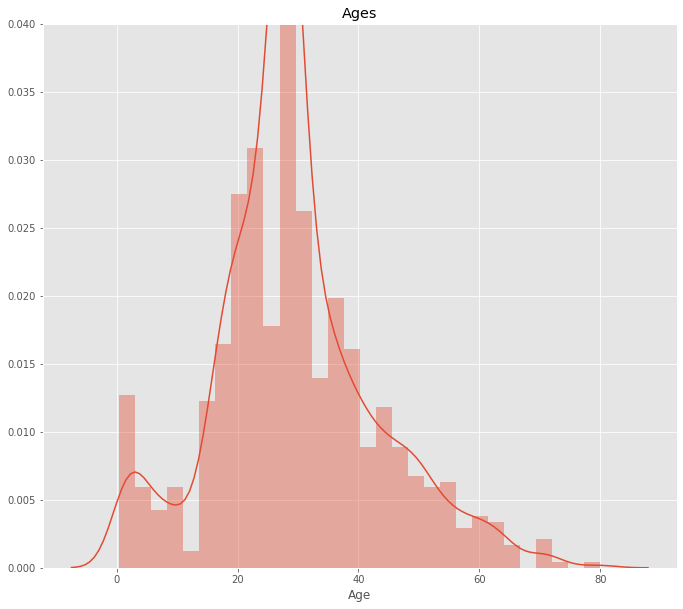

In [150]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,2,1)
ax.set_ylim(0,0.04)
sns.distplot(titanic_train['Age'], bins=30)
ax.set_title('Ages')

In [79]:
titanic_train['1'] = titanic_train['Age'] <= 5
titanic_train['2'] = (titanic_train['Age'] <= 10) & (titanic_train['Age'] > 5)
titanic_train['3'] = (titanic_train['Age'] <= 15) & (titanic_train['Age'] >10)
titanic_train['4'] = (titanic_train['Age'] <= 20) & (titanic_train['Age'] >15)
titanic_train['5'] = (titanic_train['Age'] <= 25) & (titanic_train['Age'] >20)
titanic_train['6'] = (titanic_train['Age'] <= 30) & (titanic_train['Age'] >25)
titanic_train['7'] = (titanic_train['Age'] <= 35) & (titanic_train['Age'] >30)
titanic_train['8'] = (titanic_train['Age'] <= 40) & (titanic_train['Age'] >35)
titanic_train['9'] = (titanic_train['Age'] <= 45) & (titanic_train['Age'] >40)
titanic_train['10'] = (titanic_train['Age'] <= 50) & (titanic_train['Age'] >45)
titanic_train['11'] = (titanic_train['Age'] <= 55) & (titanic_train['Age'] >50)
titanic_train['12'] = (titanic_train['Age'] <= 60) & (titanic_train['Age'] >55)
titanic_train['13'] = (titanic_train['Age'] <= 65) & (titanic_train['Age'] >60)
titanic_train['14'] = (titanic_train['Age'] <= 70) & (titanic_train['Age'] >65)
titanic_train['15'] = (titanic_train['Age'] <= 75) & (titanic_train['Age'] >70)
titanic_train['16'] = (titanic_train['Age'] <= 80) & (titanic_train['Age'] >75)
titanic_train['17'] = (titanic_train['Age'] <= 85) & (titanic_train['Age'] >80)

In [88]:
titanic_train = titanic_train.drop(columns=['PassengerId'])

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [89]:
titanic_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'isFamily',
       'isAlone', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17'],
      dtype='object')

In [86]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 1, 'female': 0})

In [151]:
X = titanic_train.drop(['Survived', 'Embarked', 'Age'], axis=1)
y = titanic_train['Survived']
X.shape, y.shape
X_array = np.array(X).copy()
y_array = np.array(y).copy()

,Pclass,Sex,Fare,isFamily,isAlone,1,2,3,4,5,...,8,9,10,11,12,13,14,15,16,17
0,3,1,7.2500,2,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,0,71.2833,2,0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,0,7.9250,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,53.1000,2,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1,8.0500,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


0      0
1      0
2      1
3      0
4      1
5      1
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     0
28     1
29     1
      ..
861    0
862    1
863    0
864    1
865    1
866    0
867    1
868    1
869    0
870    1
871    0
872    1
873    1
874    0
875    1
876    1
877    1
878    1
879    0
880    0
881    1
882    1
883    1
884    1
885    0
886    1
887    1
888    0
889    1
890    1
Name: isAlone, Length: 891, dtype: int64

In [114]:
model_svm = SVC(kernel='linear', C=1, gamma='auto')
score = cross_val_score(model_svm, X_array, y_array, scoring='accuracy', cv=10, n_jobs=-1).mean()
print(score)

0.8226926569061401


In [115]:
xtrain, xtest, ytrain, ytest = train_test_split(X_array, y_array, test_size=.3)

In [123]:
stand_scaler = StandardScaler()
xtrain = stand_scaler.fit_transform(xtrain)
xtest = stand_scaler.fit_transform(xtest)
model_svm.fit(xtrain, ytrain)
y_prediction = model_svm.predict(xtest)
print(accuracy_score(ytest, y_prediction))

0.8134328358208955


In [ ]:
def plotSVC(title):
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() — 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() — 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

 plt.subplot(1, 1, 1)
 Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
 plt.xlabel(‘live’)
 plt.ylabel(‘type’)
 plt.xlim(xx.min(), xx.max())
 plt.title(title)
 plt.show()